In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split    
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from RSData import *
from HaiYangData import *
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sea_ice_model import * 
from sklearn import svm
import graphviz
import pandas as pd
import numpy as np
import glob,os
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches




In [2]:
#数据切分, 按照7：3切分训练集与测试集
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']    
##  data_df：原始数据
##  object_col：目标变量


In [3]:
# 尝试-11dB
# csv_files.extend(glob.glob(r'D:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold\-11dB_threshold_month10' + '\*.csv'))




In [4]:
csv_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold'
csv_files = glob.glob(csv_dir + '\*.csv')


In [5]:
data = get_data_from_csv(csv_files[:])

In [6]:
process_sea_ice_train_dataframe(data)

KeyboardInterrupt: 

# 绘制所有冰型的点的直方图


In [7]:
bins = np.arange(-25,-5,0.2)

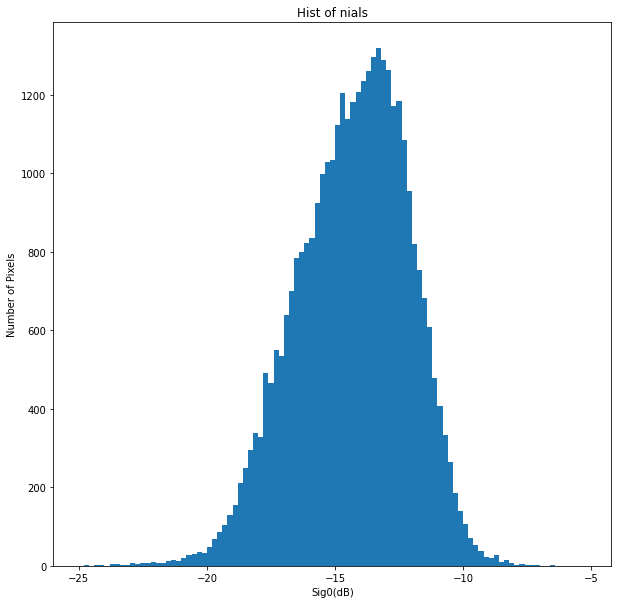

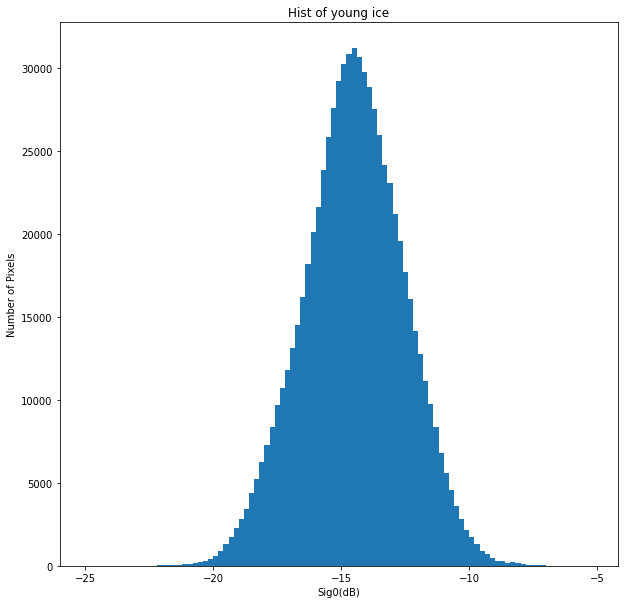

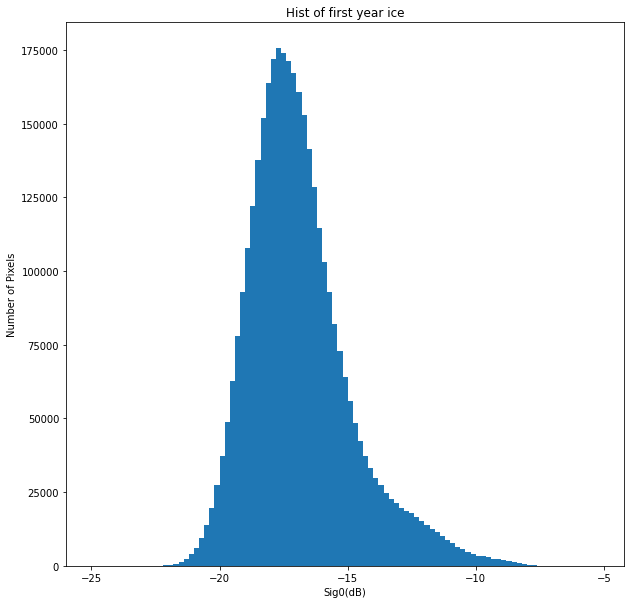

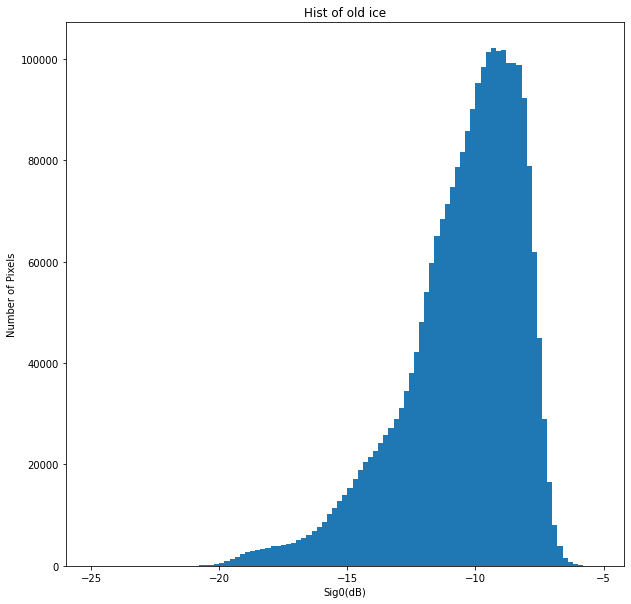

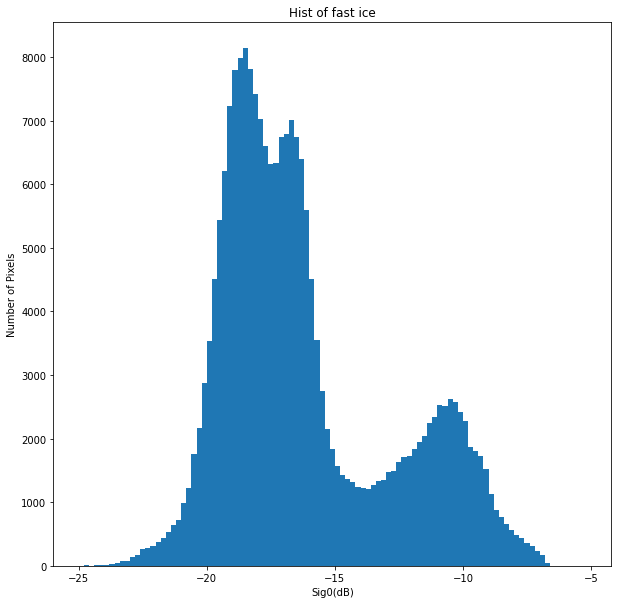

In [47]:
for index in range (1,6):
    fig =plt.figure(figsize=(10,10))
    plt.hist(data[data['ice_type' ] ==index]['sig0'], bins=bins)
    plt.xticks(np.arange(-25,-4.9,5))
#     plt.yticks(np.arange(0,240000,20000))
    
    plt.xlabel('Sig0(dB)')
    plt.ylabel('Number of Pixels')
    plt.title('Hist of '+str(classes[index-1]))
    plt.savefig(r'D:\python_workfile\sea_ice_classification\training6\hist\total\\' +classes[index-1]+r' histogram.png')

    

# 预测冰型

# SVM算法

pre_label = ['VV+HH','VV-HH']
target_label = ['ice_type']
# classes表示不同类别的名称，比如这有5个类别
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']


# 正则化
# X_train, X_test, Y_train, Y_test  = data_split(data[['lon_nor','lat_nor','sig0_nor','julian_day_nor','large_than_threshold','ice_type']] , 'ice_type')

X_train, X_test, Y_train, Y_test  = data_split(data[pre_label+target_label] , target_label)


svc_nonlinear = svm.SVC()


y_ = svc_nonlinear.fit(X_train.astype('int'), Y_train.astype('int')).predict(X_test)

y_ = y_.astype(np.int32)

## 决策树算法

In [ ]:
pre_label = ['lon','lat','sig0','day','large_than_threshold']
target_label = ['ice_type']
# classes表示不同类别的名称，比如这有5个类别
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']


In [ ]:
# 正则化
# X_train, X_test, Y_train, Y_test  = data_split(data[['lon_nor','lat_nor','sig0_nor','julian_day_nor','large_than_threshold','ice_type']] , 'ice_type')

X_train, X_test, Y_train, Y_test  = data_split(data[pre_label+target_label] , target_label)


In [ ]:
clf = tree.DecisionTreeRegressor()
y_ = clf.fit(X_train, Y_train).predict(X_test)


In [ ]:
y_ = y_.astype(np.int32)

## k-nn算法

# data = data.drop(columns = 'time')

k_numbers = 90
knn = neighbors.KNeighborsRegressor(k_numbers, weights='distance')
y_ = knn.fit(X_train, Y_train).predict(X_test)

y_ = np.round(y_)

## 随机森林算法

rf = RandomForestClassifier(n_estimators=100, max_features=1)

y_ = rf.fit(X_train, Y_train).predict(X_test)

y_ = np.round(y_)

In [ ]:
Y_test = Y_test.astype(np.int32)

plt.hist(Y_test,bins=12)
plt.title('Y_true_hist rf')
scale_ls = range(6)
index_ls = ['  ','nials', 'young ice', 'first year ice', 'old ice', 'fast ice']
plt.xticks(scale_ls,index_ls)
plt.yticks(range(0,400001,100000))
plt.savefig('Y_true_hist.jpg')

In [ ]:
print(precision_score(Y_test, y_, average='weighted')) 


In [ ]:
# 获取混淆矩阵"
cm = confusion_matrix(Y_test, y_)

In [ ]:

predict_save_dir = r'E:\python_workfile\sea_ice_classification\training6\dt_output\split_VV_HH\VV\DOY+dynamic_threshold'

In [ ]:
output_grid_save_path = predict_save_dir + r'\grid'

In [50]:

plot_confusion_matrix(classes,cm, savename=predict_save_dir+r'\confusion_matrix_decisition tree.png', title='confusion matrix precision:{0} '.format(precision_score(Y_test, y_, average='weighted')))
# np.save('confusion_matrix',arr=cm)

In [ ]:
satellite = r'AARI'
sensor = r'AARI'
hy_sca = HaiYangData(satellite=satellite, sensor=sensor,resolution=30000)
# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")
transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

val_dir = csv_dir+r'\val'
val_csv_files = glob.glob(val_dir + '\*.csv')


In [ ]:


# 动态阈值画图用
FYI_dynamic = mpatches.Patch(color='maroon', label='First Year Ice')
MYI_dynamic = mpatches.Patch(color='midnightblue', label='Multi-Year Ice')

# 做海冰分类差画图用(5类)
color_diff_1 = mpatches.Patch(color='darkorange', label='1')
color_diff_2 = mpatches.Patch(color='rebeccapurple', label='2')
color_diff_3 = mpatches.Patch(color='yellow', label='3')
color_diff_4 = mpatches.Patch(color='tab:brown', label='4')
color_diff_1_neg = mpatches.Patch(color='lightpink', label='-1')
color_diff_2_neg = mpatches.Patch(color='forestgreen', label='-2')
color_diff_3_neg = mpatches.Patch(color='tab:blue', label='-3')
color_diff_4_neg = mpatches.Patch(color='lightblue', label='-4')

# 做海冰分类差画图用(2类)
FYI_C_MYI = mpatches.Patch(color='midnightblue', label='Ture: FYI \n Predict: MYI')
MYI_C_FYI = mpatches.Patch(color='maroon', label='Ture: MYI \n Predict: FYI')

In [ ]:
font = {
    'size':18
}

In [ ]:
FI = mpatches.Patch(color='maroon', label='Fast Ice')
OI = mpatches.Patch(color='orange', label='Old Ice')
FYI = mpatches.Patch(color='lime', label='First Year Ice')
YI = mpatches.Patch(color='dodgerblue', label='Young Ice')
N = mpatches.Patch(color='midnightblue', label='Nilas')

# 动态阈值画图用
FYI_dynamic = mpatches.Patch(color='maroon', label='First Year Ice')
MYI_dynamic = mpatches.Patch(color='midnightblue', label='Multi-Year Ice')


In [ ]:
true_grid_save_path = r'E:\python_workfile\sea_ice_classification\training7\dataset\val_grid'

In [22]:


for val_csv_file in val_csv_files[:]:
    day = val_csv_file.split('\\')[-1].split('.')[0]
    val_data = pd.read_csv(val_csv_file,index_col=None,encoding='ANSI')
#     val_data['week'] = val_data['time'].apply(strftime_week)
#     val_data['day'] = val_data['time'].apply(strftime_day)
#     val_data['julian_day'] = val_data['time'].apply(strftime_julian_day)
#     val_data['julian_week'] = val_data['time'].apply(strftime_julian_week)
#     nor_dataframe(val_data)
    process_sea_ice_train_dataframe(val_data,fyi_myi=False)
    y_val = clf.predict(val_data[pre_label])
    y_val = np.round(y_val)
    
    cm = confusion_matrix(val_data['ice_type'], y_val)
    if cm.shape[0]<5:
        pad_value = 5-cm.shape[0]
        cm = np.pad(cm, (0,pad_value), 'constant')
    plot_confusion_matrix(classes,cm, predict_save_dir + '\\'+str(day)+'confusion_matrix_decisition tree.png', title='confusion matrix precision:{0} '.format(precision_score(val_data['ice_type'], y_val, average='weighted')))
    value_array = np.empty(shape=(y_val.shape[0],6))


    value_array[:,0] = val_data['lat']
    value_array[:,1] = val_data['lon']
    value_array[:,2],value_array[:,3] = transformer.transform(value_array[:,0], value_array[:,1])
    value_array[:,4] = val_data['ice_type']
    value_array[:,5] = y_val

    grid_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_num_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_array_predict = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_array_diff = np.zeros((hy_sca.nlat, hy_sca.nlon))

    x = (value_array[:,2] / hy_sca.resolution).astype(np.int16)
    y = (value_array[:,3] / hy_sca.resolution).astype(np.int16)


    grid_array[y,x] += value_array[:,4]
    grid_num_array[y,x] += 1

    grid_array_predict[y,x] += value_array[:,5]
    grid_num_array[y,x] += 1

    x_map, y_map = hy_sca.get_map_grid(transformer_back)
    
    
    grid_array[grid_array == 0] = np.nan

    
    grid_array_predict[grid_array_predict == 0] = np.nan
    
    
#     # 存储结果grid
#     np.save(output_grid_save_path+f'\\{day}.npy',grid_array_predict)

#     # 绘制预测值
#     fig = plt.figure(figsize=(9, 9))
#     fig.add_subplot(111)
#     fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 

#     hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
#     hy_m.pcolor(x_map, y_map, data=grid_array_predict, cmap=plt.cm.jet,shading = 'auto',vmax=5,vmin=1,latlon = True)

#     hy_m.fillcontinents()
#     hy_m.drawmapboundary()
#     hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
#     hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
#     plt.title('Predict mask '+str(day))
#     plt.legend(loc='upper right',handles=[FI,OI ,FYI, YI ,N], title='Ice Type')
#     plt.savefig(predict_save_dir+'\\predict '+str(day)+'.png')
#     plt.close()
    
#     # 绘制真值
#     fig = plt.figure(figsize=(9, 9))
#     fig.add_subplot(111)
#     fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 

#     hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
#     hy_m.pcolor(x_map, y_map, data=grid_array, cmap=plt.cm.jet,shading = 'auto',vmax=5,vmin=1,latlon = True)

#     hy_m.fillcontinents()
#     hy_m.drawmapboundary()
#     hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
#     hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
#     plt.title('True mask '+str(day))
#     plt.legend(loc='upper right',handles=[FI,OI ,FYI, YI ,N], title='Ice Type')
#     plt.savefig(predict_save_dir+'\\True '+str(day)+'.png')
#     plt.close()
    # 存储真值
    np.save(true_grid_save_path+f'\\{day}.npy',grid_array)
    #计算差值
    
#     grid_array[grid_array <=3] = 1
#     grid_array[grid_array >3] = 2
#     grid_array_predict[grid_array_predict <=3] = 1
#     grid_array_predict[grid_array_predict >3] = 2
    
#     grid_array_diff = grid_array - grid_array_predict
#     grid_array_diff[grid_array_diff == 0] = np.nan
#     # 绘制差值
    
#     fig = plt.figure(figsize=(9, 9))
#     fig.add_subplot(111)
#     fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 

#     hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
#     hy_m.pcolor(x_map, y_map, data=grid_array_diff, cmap=plt.cm.jet,shading = 'auto',vmax=1,vmin=-1,latlon = True)

#     hy_m.fillcontinents()
#     hy_m.drawmapboundary()
#     hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
#     hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
#     plt.title('Diff mask '+str(day) + '  True mask - Predict Mask')
#     plt.legend(loc='upper right',handles=[FYI_C_MYI,MYI_C_FYI ], title='Ice Type Diff', prop=font)
#     plt.savefig(predict_save_dir+'\\Diff '+str(day)+'.png')
#     plt.close()
    
    
    
    print(f'now processed csv file {val_csv_file}')
    print(predict_save_dir+'\\True '+str(day)+'.png')
    
    

now processed csv file E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold\val\20191029.csv
E:\python_workfile\sea_ice_classification\training6\dt_output\split_VV_HH\VV\DOY+dynamic_threshold\True 20191029.png
now processed csv file E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold\val\20191223.csv
E:\python_workfile\sea_ice_classification\training6\dt_output\split_VV_HH\VV\DOY+dynamic_threshold\True 20191223.png
now processed csv file E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold\val\20200123.csv
E:\python_workfile\sea_ice_classification\training6\dt_output\split_VV_HH\VV\DOY+dynamic_threshold\True 20200123.png
now processed csv file E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV\dynamic_threshold\val\20200223.csv
E:\python_workfile\sea_ice_classification\training6\dt_output\split_VV_HH\VV\DOY+dynamic_threshold\True 20200223.png
now processed cs

# 绘制阈值分类多年冰一年冰

In [ ]:


for val_csv_file in val_csv_files[:]:
    day = val_csv_file.split('\\')[-1].split('.')[0]
    val_data = pd.read_csv(val_csv_file,index_col=None,encoding='ANSI')
#     val_data['week'] = val_data['time'].apply(strftime_week)
#     val_data['day'] = val_data['time'].apply(strftime_day)
#     val_data['julian_day'] = val_data['time'].apply(strftime_julian_day)
#     val_data['julian_week'] = val_data['time'].apply(strftime_julian_week)
#     nor_dataframe(val_data)
    process_sea_ice_train_dataframe(val_data)
#     y_val = clf.predict(val_data[pre_label])
#     y_val = np.round(y_val)
    
#     cm = confusion_matrix(val_data['fyi_myi'], val_data['large_than_threshold'])
#     if cm.shape[0]<2:
#         pad_value = 2-cm.shape[0]
#         cm = np.pad(cm, (0,pad_value), 'constant')
#     plot_confusion_matrix(['FYI, MYI'],cm, predict_save_dir + '\\'+str(day)+'confusion_matrix_threshold.png', title='confusion matrix precision:{0} '.format(precision_score(val_data['fyi_myi'], val_data['large_than_threshold'], average='binary')))
    
    value_array = np.empty(shape=(val_data.shape[0],6))
    value_array[:,0] = val_data['lat']
    value_array[:,1] = val_data['lon']
    value_array[:,2],value_array[:,3] = transformer.transform(value_array[:,0], value_array[:,1])
    value_array[:,4] = val_data['ice_type']
    value_array[:,5] = val_data['large_than_threshold']+1

    grid_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_num_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_array_predict = np.zeros((hy_sca.nlat, hy_sca.nlon))

    x = (value_array[:,2] / hy_sca.resolution).astype(np.int16)
    y = (value_array[:,3] / hy_sca.resolution).astype(np.int16)


    grid_array[y,x] += value_array[:,4]
    grid_num_array[y,x] += 1

    grid_array_predict[y,x] += value_array[:,5]
    grid_num_array[y,x] += 1

    x_map, y_map = hy_sca.get_map_grid(transformer_back)

    grid_array[grid_array == 0] = np.nan
    grid_array_predict[grid_array_predict == 0] = np.nan

    fig = plt.figure(figsize=(9, 9))
    fig.add_subplot(111)
    fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 

    hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
    hy_m.pcolor(x_map, y_map, data=grid_array_predict, cmap=plt.cm.jet,shading = 'auto',vmax=2,vmin=1,latlon = True)
    hy_m.fillcontinents()
    hy_m.drawmapboundary()
    hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
    hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
    plt.title('Predict mask '+str(day))
    plt.legend(loc='upper right',handles=[FYI_dynamic,MYI_dynamic], title='Ice Type')
#     plt.colorbar()
    plt.savefig(predict_save_dir+'\\Threshold '+str(day)+'.png')
    plt.close()


    print(val_csv_file)


## 不画真值的版本

In [ ]:
def process_sea_ice_train_dataframe(dataframe, fyi_myi=True):
    dataframe['week'] = dataframe['time'].apply(strftime_week)

    dataframe['day'] = dataframe['time'].apply(strftime_day)

    dataframe['month'] = dataframe['time'].apply(strftime_month)

    #     dataframe['year'] = dataframe['time'].apply(strftime_year)

    dataframe['julian_week'] = dataframe['time'].apply(strftime_julian_week)
    dataframe['julian_day'] = dataframe['time'].apply(strftime_julian_day)

    dataframe.time = pd.to_datetime(dataframe.time)

    dataframe['quarter'] = pd.PeriodIndex(dataframe.time, freq='Q')

    dataframe['quarter1'] = dataframe['quarter'].apply(strftime_quarter)
    if fyi_myi:
        dataframe['fyi_myi'] = dataframe['ice_type'].apply(strf_icetype)

In [ ]:

for val_csv_file in val_csv_files[:]:
    day = val_csv_file.split('\\')[-1].split('.')[0]
    val_data = pd.read_csv(val_csv_file,index_col=None,encoding='ANSI')
#     val_data['week'] = val_data['time'].apply(strftime_week)
#     val_data['day'] = val_data['time'].apply(strftime_day)
#     val_data['julian_day'] = val_data['time'].apply(strftime_julian_day)
#     val_data['julian_week'] = val_data['time'].apply(strftime_julian_week)
#     nor_dataframe(val_data)
    process_sea_ice_train_dataframe(val_data,fyi_myi=False)
    y_val = clf.predict(val_data[pre_label])
    y_val = np.round(y_val)
    
    value_array = np.empty(shape=(y_val.shape[0],6))
    value_array[:,0] = val_data['lat']
    value_array[:,1] = val_data['lon']
    value_array[:,2],value_array[:,3] = transformer.transform(value_array[:,0], value_array[:,1])
    value_array[:,4] = val_data['ice_type']
    value_array[:,5] = y_val

    grid_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_num_array = np.zeros((hy_sca.nlat, hy_sca.nlon))
    grid_array_predict = np.zeros((hy_sca.nlat, hy_sca.nlon))

    x = (value_array[:,2] / hy_sca.resolution).astype(np.int)
    y = (value_array[:,3] / hy_sca.resolution).astype(np.int)


    grid_array[y,x] += value_array[:,4]
    grid_num_array[y,x] += 1

    grid_array_predict[y,x] += value_array[:,5]
    grid_num_array[y,x] += 1

    x_map, y_map = hy_sca.get_map_grid(transformer_back)

    grid_array[grid_array == 0] = np.nan
    grid_array_predict[grid_array_predict == 0] = np.nan

    fig = plt.figure(figsize=(9, 9))
    fig.add_subplot(111)
    fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 

    hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
    hy_m.pcolormesh(x_map, y_map, data=grid_array_predict, cmap=plt.cm.jet,shading = 'auto',vmax=5,vmin=1,latlon = True)

    hy_m.fillcontinents()
    hy_m.drawmapboundary()
    hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
    hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
    plt.title('Predict mask '+str(day))
    plt.legend(loc='upper right',handles=[FI,OI ,FYI, YI ,N], title='Ice Type')
    plt.savefig(predict_save_dir+'\\predict '+str(day)+'.png')
    plt.close()

    print(val_csv_file)


## 决策树算法可视化

In [ ]:
# dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=['lon','lat','sig0','day','large_than_threshold'],  
#                      class_names=classes,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
dot_data = tree.export_graphviz(clf, out_file=None)  

graph = graphviz.Source(dot_data)  
graph.render("sea_ice_classfication_dt")

In [ ]:
dot_data